In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers

In [32]:
## Loading the Datasets
data = pd.read_csv('high_diamond_ranked_10min.csv')

data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [33]:
data.shape

(9879, 40)

In [34]:
data.drop('gameId', axis=1, inplace=True)

In [35]:
data = data.sample(frac=1).reset_index(drop=True)

In [36]:
y = data['blueWins']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: blueWins, dtype: int64

In [37]:
X = data.drop("blueWins", axis=1)
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,20,2,1,8,5,7,0,0,0,0,...,0,16357,6.8,18172,223,56,-1868,-726,22.3,1635.7
1,15,2,0,16,10,17,2,1,1,0,...,0,17169,6.6,16671,162,32,-3175,-1975,16.2,1716.9
2,18,1,1,4,12,7,0,0,0,0,...,0,18417,7.0,18513,218,44,3184,2345,21.8,1841.7
3,15,2,1,9,2,13,0,0,0,0,...,0,14231,7.0,17228,213,48,-4152,-1466,21.3,1423.1
4,36,0,1,5,4,6,0,0,0,0,...,0,14714,6.6,16638,186,63,-1173,-953,18.6,1471.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,16,3,0,10,7,12,0,0,0,0,...,0,16387,7.2,17925,198,56,-1452,-689,19.8,1638.7
9875,15,2,1,8,2,10,0,0,0,0,...,0,14642,7.2,18316,180,67,-2978,438,18.0,1464.2
9876,10,1,0,10,15,8,0,0,0,0,...,0,19716,7.2,19750,171,46,2298,1255,17.1,1971.6
9877,45,5,1,3,8,4,0,0,0,0,...,0,17132,7.0,17945,231,35,2808,1555,23.1,1713.2


In [38]:
mat = X.corr()

<AxesSubplot:>

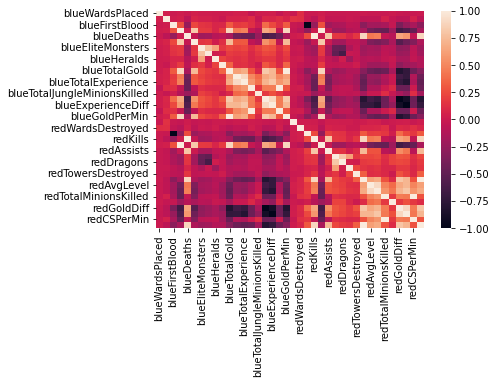

In [39]:
sns.heatmap(X.corr())

In [40]:
train_test_split = 0.8

num_examples = X.shape[0]
num_train_examples = int(np.floor(num_examples*train_test_split))
num_test_examples = int(np.ceil(num_examples - num_train_examples))

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
7903
1976


In [41]:
7903+1976

9879

In [43]:
# X_train = X.iloc[0:num_train_examples, :]
# y_train = y.iloc[0:num_train_examples]

# X_test = X.iloc[num_train_exmaples:num_examples, :]
# y_test = y.iloc[num_train_exmaples:num_examples]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [46]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [47]:
inputs = tf.keras.Input(shape=(38,))
X = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
X = tf.keras.layers.Dense(16, activation=tf.nn.relu)(X)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(X)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_3 (Dense)             (None, 16)                624       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
    optimizer = optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [51]:
y.sum()/y.shape

array([0.49903836])

In [52]:
BATCH_SIZE = 32
EPOCHS = 300

In [53]:
model.fit(
    x = X_train,
    y = y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/300
198/198 [==============================] - 3s 8ms/step - loss: 231.7861 - accuracy: 0.6378 - val_loss: 25.5905 - val_accuracy: 0.6977
Epoch 2/300
198/198 [==============================] - 1s 3ms/step - loss: 12.8746 - accuracy: 0.6599 - val_loss: 2.8233 - val_accuracy: 0.7021
Epoch 3/300
198/198 [==============================] - 1s 4ms/step - loss: 8.6976 - accuracy: 0.6444 - val_loss: 7.1862 - val_accuracy: 0.6173
Epoch 4/300
198/198 [==============================] - 1s 4ms/step - loss: 5.1721 - accuracy: 0.6395 - val_loss: 6.9019 - val_accuracy: 0.5566
Epoch 5/300
198/198 [==============================] - 1s 4ms/step - loss: 7.6418 - accuracy: 0.6332 - val_loss: 3.1808 - val_accuracy: 0.6913
Epoch 6/300
198/198 [==============================] - 1s 6ms/step - loss: 4.5478 - accuracy: 0.6324 - val_loss: 3.0769 - val_accuracy: 0.7204
Epoch 7/300
198/198 [==============================] - 1s 6ms/step - loss: 6.0148 - accuracy: 0.6409 - val_loss: 4.0907 - val_accuracy: 0.

Epoch 58/300
198/198 [==============================] - 1s 3ms/step - loss: 1.1768 - accuracy: 0.6460 - val_loss: 1.0208 - val_accuracy: 0.6856
Epoch 59/300
198/198 [==============================] - 1s 3ms/step - loss: 1.3955 - accuracy: 0.6400 - val_loss: 1.2512 - val_accuracy: 0.6028
Epoch 60/300
198/198 [==============================] - 1s 6ms/step - loss: 1.0146 - accuracy: 0.6612 - val_loss: 0.5895 - val_accuracy: 0.7217
Epoch 61/300
198/198 [==============================] - 1s 7ms/step - loss: 1.0693 - accuracy: 0.6523 - val_loss: 0.9183 - val_accuracy: 0.7065
Epoch 62/300
198/198 [==============================] - 1s 7ms/step - loss: 0.9303 - accuracy: 0.6574 - val_loss: 2.1499 - val_accuracy: 0.5534
Epoch 63/300
198/198 [==============================] - 1s 6ms/step - loss: 1.4423 - accuracy: 0.6411 - val_loss: 2.4665 - val_accuracy: 0.6698
Epoch 64/300
198/198 [==============================] - 1s 6ms/step - loss: 0.9906 - accuracy: 0.6484 - val_loss: 1.6355 - val_accuracy:

Epoch 115/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.6742 - val_loss: 0.5645 - val_accuracy: 0.7299
Epoch 116/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6211 - accuracy: 0.6824 - val_loss: 0.5900 - val_accuracy: 0.7002
Epoch 117/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6343 - accuracy: 0.6411 - val_loss: 0.6088 - val_accuracy: 0.6572
Epoch 118/300
198/198 [==============================] - 1s 7ms/step - loss: 0.5927 - accuracy: 0.7018 - val_loss: 0.5885 - val_accuracy: 0.7034
Epoch 119/300
198/198 [==============================] - 1s 7ms/step - loss: 0.5922 - accuracy: 0.7033 - val_loss: 0.6133 - val_accuracy: 0.7173
Epoch 120/300
198/198 [==============================] - 1s 7ms/step - loss: 0.5937 - accuracy: 0.7010 - val_loss: 0.5617 - val_accuracy: 0.7204
Epoch 121/300
198/198 [==============================] - 1s 7ms/step - loss: 0.5963 - accuracy: 0.7052 - val_loss: 0.5526 - val_ac

198/198 [==============================] - 1s 5ms/step - loss: 0.5964 - accuracy: 0.7086 - val_loss: 0.5922 - val_accuracy: 0.6901
Epoch 172/300
198/198 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.6772 - val_loss: 0.6121 - val_accuracy: 0.6578
Epoch 173/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6488 - accuracy: 0.6022 - val_loss: 0.6464 - val_accuracy: 0.5724
Epoch 174/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6283 - accuracy: 0.6405 - val_loss: 0.6182 - val_accuracy: 0.6338
Epoch 175/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6147 - accuracy: 0.6984 - val_loss: 0.5841 - val_accuracy: 0.7059
Epoch 176/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.6854 - val_loss: 0.6840 - val_accuracy: 0.5402
Epoch 177/300
198/198 [==============================] - 1s 3ms/step - loss: 0.6294 - accuracy: 0.6539 - val_loss: 0.6004 - val_accuracy: 0.7059

198/198 [==============================] - 1s 6ms/step - loss: 0.6150 - accuracy: 0.6675 - val_loss: 0.5997 - val_accuracy: 0.6730
Epoch 228/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6231 - accuracy: 0.6549 - val_loss: 0.6836 - val_accuracy: 0.5275
Epoch 229/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6483 - accuracy: 0.6017 - val_loss: 0.6273 - val_accuracy: 0.6211
Epoch 230/300
198/198 [==============================] - 1s 6ms/step - loss: 0.6109 - accuracy: 0.6743 - val_loss: 0.6077 - val_accuracy: 0.6591
Epoch 231/300
198/198 [==============================] - 1s 6ms/step - loss: 0.5949 - accuracy: 0.6946 - val_loss: 0.5796 - val_accuracy: 0.7078
Epoch 232/300
198/198 [==============================] - 1s 6ms/step - loss: 0.5841 - accuracy: 0.7156 - val_loss: 0.6376 - val_accuracy: 0.6888
Epoch 233/300
198/198 [==============================] - 1s 5ms/step - loss: 0.6025 - accuracy: 0.7058 - val_loss: 0.5556 - val_accuracy: 0.7337

198/198 [==============================] - 1s 5ms/step - loss: 0.6419 - accuracy: 0.6909 - val_loss: 0.6032 - val_accuracy: 0.7084
Epoch 284/300
198/198 [==============================] - 1s 5ms/step - loss: 0.6465 - accuracy: 0.6965 - val_loss: 0.5445 - val_accuracy: 0.7324
Epoch 285/300
198/198 [==============================] - 1s 5ms/step - loss: 0.5855 - accuracy: 0.7129 - val_loss: 0.5541 - val_accuracy: 0.7204
Epoch 286/300
198/198 [==============================] - 1s 5ms/step - loss: 0.5984 - accuracy: 0.7066 - val_loss: 0.5767 - val_accuracy: 0.7128
Epoch 287/300
198/198 [==============================] - 1s 5ms/step - loss: 0.5938 - accuracy: 0.7075 - val_loss: 0.5865 - val_accuracy: 0.7015
Epoch 288/300
198/198 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.7118 - val_loss: 0.5773 - val_accuracy: 0.7097
Epoch 289/300
198/198 [==============================] - 1s 3ms/step - loss: 0.5802 - accuracy: 0.7188 - val_loss: 0.5616 - val_accuracy: 0.7217

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.6210
